## Биномиальное распределение - распределение количества «успехов» в последовательности из n независимых случайных экспериментов, таких что вероятность «успеха» в каждом из них равна p.

In [73]:
from scipy.stats import binom, poisson, norm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np


def generate_samples(distribution, **kwargs):
    return distribution.rvs(**kwargs)

from statsmodels.stats.gof import gof_binning_discrete

from scipy import stats


## Биномиальное распределение: проверка с истинным р 

Test passed


(array([  2.,   0.,   1.,   2.,  24.,  39.,  40.,  89., 115.,  77., 171.,
        142., 118.,  43.,  72.,  36.,  17.,   8.,   1.,   3.]),
 array([22. , 23.7, 25.4, 27.1, 28.8, 30.5, 32.2, 33.9, 35.6, 37.3, 39. ,
        40.7, 42.4, 44.1, 45.8, 47.5, 49.2, 50.9, 52.6, 54.3, 56. ]),
 <BarContainer object of 20 artists>)

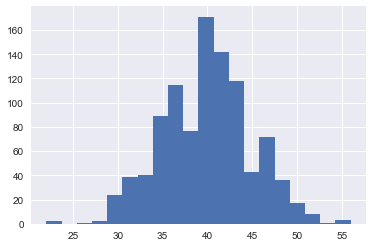

In [92]:
p = 0.4
n = 100
alpha = 0.05
samples = generate_samples(binom, p=p, n=n, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, binom, (n, p))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')
    
plt.hist(samples, bins=20)

##  Биномиальное распределение: проверка с p/2


In [26]:
p = 0.4
n = 100
alpha = 0.05
samples = generate_samples(binom, p=p, n=n, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, binom, (n, p/2))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')


Test failed


## Распределение Пуассона: проверка с истинным $\mu$

Test passed


(array([688.,   0.,   0.,   0.,   0., 259.,   0.,   0.,   0.,   0.,  48.,
          0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   2.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 20 artists>)

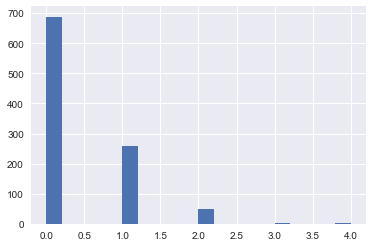

In [93]:
mu = 0.4
alpha = 0.05
samples = generate_samples(poisson, mu=mu, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, poisson, (mu, ))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')
plt.hist(samples, bins=20)

## Распределение Пуассона: проверка с $\frac{\mu}{2}$

In [31]:
mu = 0.4
alpha = 0.05
samples = generate_samples(poisson, mu=mu, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, poisson, (mu/2, ))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')

Test failed


## Нормальное распределение: проверка с истинными значением среднего

Test passed


(array([ 11.,  10.,  40.,  57.,  64.,  91., 113., 132., 103., 112.,  97.,
         64.,  51.,  28.,  15.,   9.,   1.,   1.,   0.,   1.]),
 array([-4.18616149, -3.5492726 , -2.91238371, -2.27549482, -1.63860593,
        -1.00171704, -0.36482815,  0.27206075,  0.90894964,  1.54583853,
         2.18272742,  2.81961631,  3.4565052 ,  4.09339409,  4.73028298,
         5.36717188,  6.00406077,  6.64094966,  7.27783855,  7.91472744,
         8.55161633]),
 <BarContainer object of 20 artists>)

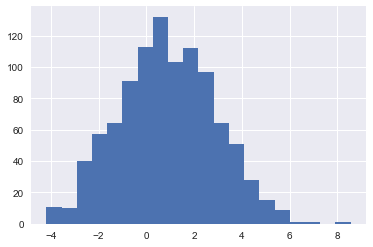

In [94]:
loc = 1
scale = 2
samples = generate_samples(norm, loc=loc, scale=scale, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, norm, (loc, scale))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')
plt.hist(samples, bins=20)

## Нормальное распределение: проверка со значением среднего в два раза меньше истинного

In [95]:
loc = 1
scale = 2
samples = generate_samples(norm, loc=loc, scale=scale, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, norm, (loc/2, scale))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')

Test failed


## Функция лог-правдоподобия (без логарифма маленькие значения, меньше машинной точности)

In [96]:
def norm_likelihood(loc=loc, scale=scale, samples=samples):
    return np.log(norm.pdf(samples, loc=loc, scale=scale)).sum()

In [81]:
norm_likelihood(loc=loc, scale=scale, samples=samples[:10])

-23.02011603653825

## Оценка MLE для среднего

In [82]:
from scipy.optimize import minimize

In [83]:
def neg_likelihood(*args, **kwargs):
    return -norm_likelihood(*args, **kwargs)

In [85]:
from functools import partial
minimize(partial(neg_likelihood, samples=samples[:10], scale=scale), x0=0.5)

      fun: 23.017626424587302
 hess_inv: array([[1]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([0.95537167])